# Data processing

This notebook will deal with the processing of the characteristics of our recipe dataset. We will see how to transform the categorical columns into numerical ones and we will leave a new dataset in h5 format ready to train our recommender model.

Let's look again at the data types of our columns.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
recipe_df = pd.read_csv('../data/processed/recipe_to_db.csv')
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226657 entries, 0 to 226656
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 226657 non-null  object 
 1   id                   226657 non-null  int64  
 2   minutes              226657 non-null  float64
 3   contributor_id       226657 non-null  int64  
 4   submitted            226657 non-null  object 
 5   tags                 226657 non-null  object 
 6   n_steps              226657 non-null  int64  
 7   steps                226657 non-null  object 
 8   description          226657 non-null  object 
 9   ingredients          226657 non-null  object 
 10  n_ingredients        226657 non-null  int64  
 11  calories (#)         226657 non-null  float64
 12  total fat (PDV)      226657 non-null  float64
 13  sugar (PDV)          226657 non-null  float64
 14  sodium (PDV)         226657 non-null  float64
 15  protein (PDV)    

## Numeric columns

Before looking at the categorical columns, I will focus on two columns containing numerical data: id and contributor_id. 

Id corresponds to the unique identifier of each recipe, so for practical purposes it is a column that is useless in the work of the model, so I will remove it.

In [8]:
recipe_df = recipe_df.drop(columns=['id'])

After removing this category, let's look at the contributor_id category. Unlike the previous category, in this one several recipes may have been published by the same user, so it could be useful to transform this categorical column into a numerical one that reflects, for example, the relevance of the author of the recipe (ratio of recipes published by the author over the total number of recipes published).

In [14]:
def plot_frequencies(df):
    frequencies = df.value_counts()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(frequencies, bins=30)
    plt.title('Contributor_id frequency distribution')
    plt.xlabel('Frequency')
    plt.ylabel('Contributor_id')
    plt.show()

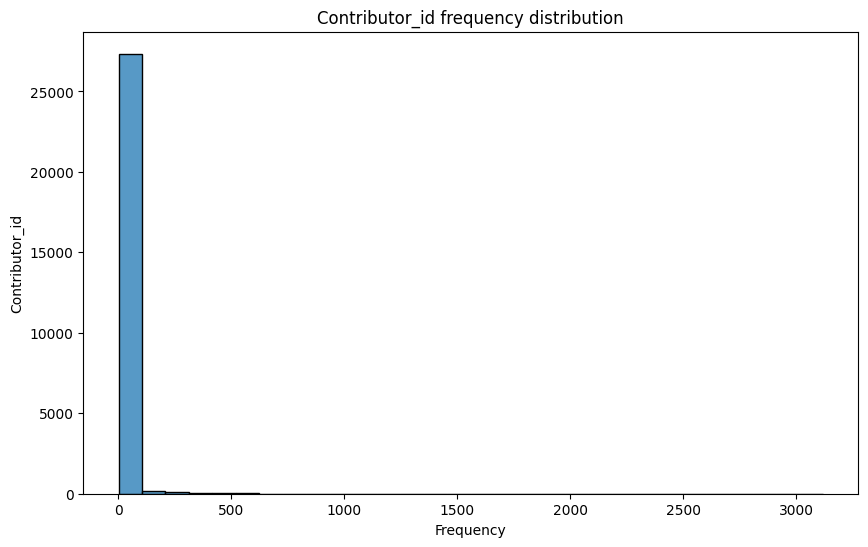

In [15]:
plot_frequencies(recipe_df['contributor_id'])

In [19]:
frequencies = recipe_df['contributor_id'].value_counts()
repeated_count = (frequencies >= 2).sum()

repeated_count/len(frequencies)

0.44989708590618566


The fact that 45% of the authors in your dataset have published at least two recipes is a relevant piece of information that can have important implications for your analysis. Although it is a column of IDs, which at first might seem merely identifying, this type of information can be evaluated as the frequency with which a given author publishes recipes.

In [20]:
recipe_df['contributor_id'] = recipe_df['contributor_id'].astype('category')

frequency_encoding = recipe_df['contributor_id'].value_counts().to_dict()
recipe_df['contributor_id_frequency'] = recipe_df['contributor_id'].map(frequency_encoding)

recipe_df = recipe_df.drop(columns=['contributor_id'])

Now our dataset looks like this.

In [21]:
recipe_df.head()

,name,minutes,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories (#),total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),contributor_id_frequency
0,arriba baked winter squash mexican style,55.0,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,735
1,a bit different breakfast pizza,30.0,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,365
2,all in the kitchen chili,130.0,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,7
3,alouette potatoes,45.0,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,114
4,amish tomato ketchup for canning,190.0,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,90


In [22]:
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226657 entries, 0 to 226656
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   name                      226657 non-null  object 
 1   minutes                   226657 non-null  float64
 2   submitted                 226657 non-null  object 
 3   tags                      226657 non-null  object 
 4   n_steps                   226657 non-null  int64  
 5   steps                     226657 non-null  object 
 6   description               226657 non-null  object 
 7   ingredients               226657 non-null  object 
 8   n_ingredients             226657 non-null  int64  
 9   calories (#)              226657 non-null  float64
 10  total fat (PDV)           226657 non-null  float64
 11  sugar (PDV)               226657 non-null  float64
 12  sodium (PDV)              226657 non-null  float64
 13  protein (PDV)             226657 non-null  f

## Cathegorical columns

Let's look again at the data types of our columns.

In order to train our future model we first need to convert these six categorical columns (name, submitted, tags, steps, description and ingredients) using a numerical representation.

In [7]:
cathegorical_cols = recipe_df.select_dtypes(include=['object', 'category']).columns
recipe_df[cathegorical_cols].head()

,name,submitted,tags,steps,description,ingredients
0,arriba baked winter squash mexican style,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ..."
1,a bit different breakfast pizza,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg..."
2,all in the kitchen chili,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato..."
3,alouette potatoes,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n..."
4,amish tomato ketchup for canning,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar..."


We can divide these categories into several groups depending on how we process them to make them numerical:
1) Numerical representation from EPOCH - submitted
2) Average number of word embeddings - name, description
3) Sum of average word embeddings - tags, ingredients
4) Division into several categories + sum of average word embeddings - steps

This may sound confusing at first, but I will explain this later in each step of the conversion of these categories.

### Numerical representation from EPOCH - submitted

The date on which the prescriptions were recorded in the dataset had been stored as a string representing a date in the format YYYYY-MM-DD. To train our recommender it is convenient to find a numerical representation for this category and I thought of using the number of seconds elapsed since the date of publication of the recipe and EPOCH (Unix Epoch) since it is a simple form of coding that facilitates the calculations and the normalisation of this information in conjunction with the rest of the variables in the dataset.

In [23]:
from datetime import datetime

In [24]:
date_array = recipe_df['submitted']
unix_time = [int(datetime.strptime(date_str, '%Y-%m-%d').timestamp()) for date_str in date_array]

recipe_df['unix_submit_time'] = unix_time
recipe_df = recipe_df.drop(columns=['submitted'])

### Average number of word embeddings - name, description

There are several columns in our dataset that have to do with raw text that either contains the name of a recipe, the steps to be followed to make it or the ingredients it requires. All these data are, like the rest, very useful to feed our model with valuable information that will improve the quality of our recommendations. But as mentioned before, categorical variables must first be transformed before they can be used. Words can either be treated with One-Hot Encoding, which converts each distinct value into an independent Boolean category; or with embeddings, which are a representation of the words in the model.

Using OHE (One-Hot Encoding) can be a good alternative if the values tend to repeat themselves and, ultimately, do not generate too many new categories. As far as the information we have is concerned, this is by no means something we are assured of as we have a vast amount of different words in the name and description categories, not to mention steps. Not even the ingredients column is spared. That is why I consider that the best thing to do is to make the pertinent transformation of these values in embeddings.

The strategy we will follow to transform the name and description categories is as follows:
First, we will obtain a list of strings representing all the words contained in each row.
Then we will extract the embeddings of all the words in the lists.
And finally, we will compute the average of these values to have a global representation of the whole phrase.

First let's get the names of the recipes by deleting any hyphens or spaces in between.

In [26]:
import re

In [27]:
pp_recipe_names = [re.split(r'[- ]+', name) for name in recipe_df['name']]

To extract these embeddings we will use the model trained by google: GoogleNews-vectors-negative300. 

In [29]:
from gensim.models import KeyedVectors
import numpy as np

In [30]:
model = KeyedVectors.load_word2vec_format('../data/embeddings/GoogleNews-vectors-negative300.bin', binary=True)

Now we will define a function that processes each list of strings contained in our name column and computes the average of the embeddings obtained for each item in the list.

In [33]:
def word_lists_to_embedding_list(word_lists, model):
    embeddings = []

    for word_list in word_lists:
        inner_embeddings = []

        for word in word_list:
            if word in model:
                word_embeddings = model[word]
                inner_embeddings.append(word_embeddings)

        if inner_embeddings:  
            average_embedding = np.mean(inner_embeddings, axis=0)
            embeddings.append(average_embedding)
    
    return embeddings

In [34]:
embeddings = word_lists_to_embedding_list(pp_recipe_names, model)

Let's replace the old name column with the embeddings columns.

In [35]:
name_embeddings_df = pd.DataFrame(embeddings)
name_embeddings_df.columns = [f'name_embedding_{i}' for i in range(name_embeddings_df.shape[1])]

recipe_df = pd.concat([recipe_df, name_embeddings_df], axis=1)

recipe_df.drop(columns=['name'], inplace=True)

del embeddings
del name_embeddings_df

In [36]:
recipe_df.head()

,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories (#),total fat (PDV),sugar (PDV),...,name_embedding_290,name_embedding_291,name_embedding_292,name_embedding_293,name_embedding_294,name_embedding_295,name_embedding_296,name_embedding_297,name_embedding_298,name_embedding_299
0,55.0,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,...,-0.099447,0.005037,-0.045776,0.111369,0.139648,-0.034017,0.043209,-0.072571,0.044840,0.109578
1,30.0,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,...,-0.025238,-0.006104,-0.063217,0.117798,0.067993,-0.103760,0.031204,0.095612,-0.072449,0.013611
2,130.0,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,...,-0.085059,-0.083569,-0.139709,0.098779,0.090723,-0.079260,0.080640,-0.000098,0.014343,0.042041
3,45.0,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,...,-0.133789,-0.291016,-0.229492,0.184570,0.335938,0.039795,0.024048,-0.024902,0.306641,0.271484
4,190.0,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,...,-0.197778,-0.085193,-0.158838,0.019275,0.134595,-0.116018,0.086377,0.084766,0.070337,0.086768


Once we have processed the name column, we now have to modify the description column.

To do this, we repeat the same process as before, cleaning up the descriptions first.

In [37]:
def clean_text(text):
    text = text.lower()
    text = text.replace('\r', ' ').replace('\n', ' ').replace('\t', ' ')
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

In [38]:
descriptions = [clean_text(desc) for desc in recipe_df['description']]

In [40]:
embeddings = word_lists_to_embedding_list(descriptions, model)

In [41]:
description_embeddings_df = pd.DataFrame(embeddings)
description_embeddings_df.columns = [f'description_embedding_{i}' for i in range(description_embeddings_df.shape[1])]

recipe_df = pd.concat([recipe_df, description_embeddings_df], axis=1)

recipe_df.drop(columns=['description'], inplace=True)

del embeddings
del description_embeddings_df

In [42]:
recipe_df.head()

,minutes,tags,n_steps,steps,ingredients,n_ingredients,calories (#),total fat (PDV),sugar (PDV),sodium (PDV),...,description_embedding_290,description_embedding_291,description_embedding_292,description_embedding_293,description_embedding_294,description_embedding_295,description_embedding_296,description_embedding_297,description_embedding_298,description_embedding_299
0,55.0,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,...,0.077787,-0.021219,-0.108340,0.082966,-0.023025,-0.151510,-0.094314,-0.015233,-0.099512,0.163292
1,30.0,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,...,0.075247,-0.016684,-0.097976,0.089674,-0.020199,-0.157902,-0.099359,-0.024231,-0.115934,0.174161
2,130.0,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,...,0.073741,0.008169,-0.095845,0.099344,-0.027458,-0.156142,-0.102071,-0.029160,-0.117177,0.143143
3,45.0,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,...,0.055963,-0.013878,-0.093955,0.098748,-0.030504,-0.156058,-0.100010,-0.029330,-0.098124,0.148429
4,190.0,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,...,0.070195,-0.003748,-0.111147,0.095595,-0.023147,-0.169922,-0.114124,-0.024847,-0.093887,0.163635


We will now set a checkpoint of our work by storing all current progress in a csv and restarting the kernel.

In [43]:
recipe_df.to_csv("../data/processed/processed_description.csv", index=False)

In [1]:
%reset -f
import re
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors

### Sum of average word embeddings - tags, ingredients

There are several columns in our dataset that have to do with raw text that either contains the name of a recipe, the steps to be followed to make it or the ingredients it requires. All these data are, like the rest, very useful to feed our model with valuable information that will improve the quality of our recommendations. But as mentioned before, categorical variables must first be transformed before they can be used. Words can either be treated with One-Hot Encoding, which converts each distinct value into an independent Boolean category; or with embeddings, which are a representation of the words in the model.

Unlike the previous case, we will process the tags and ingredients columns in such a way that we will sum the embeddings of each string list instead of calculating their average. This is done to capture a description of the complete dataset for components that are not directly related to each other. Each ingredient or tag may present different aspects of our recipes, so summing the embeddings preserves the importance of each individual element.

Much of the functionality is already defined in the function we declared earlier, however, we need to modify it so that instead of calculating the average, it calculates the sum of the embeddings.

In [2]:
def word_lists_to_embedding_list(word_lists, model):
    embeddings = []

    for sublist in word_lists:
        sublist_embeddings = []
        for word_list in sublist:
            inner_embeddings = []
            for word in word_list:
                if word in model:
                    word_embeddings = model[word]
                    inner_embeddings.append(word_embeddings)

            if inner_embeddings:  
                average_embedding = np.mean(inner_embeddings, axis=0)
                sublist_embeddings.append(average_embedding)

        if sublist_embeddings:
            total_embedding = np.sum(sublist_embeddings, axis=0)
            embeddings.append(total_embedding)
    
    return embeddings

In [3]:
recipe_df = pd.read_csv('../data/processed/processed_description.csv')
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226657 entries, 0 to 226656
Columns: 615 entries, minutes to description_embedding_299
dtypes: float64(608), int64(4), object(3)
memory usage: 1.0+ GB


In [4]:
processed_tag_list = recipe_df['tags'].tolist()
processed_tag_list[0]

"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']"

In [5]:
def word_pp(feature_list):
    super_list = []
    for elm in feature_list:
        input_string = elm.strip("[]").replace("'", "")        
        items = input_string.split(", ")
        super_list.append([re.split(r"[-\s]", item) for item in items])
        
    return super_list

In [6]:
splitted_tag_list = word_pp(processed_tag_list)
splitted_tag_list[0]

[['60', 'minutes', 'or', 'less'],
 ['time', 'to', 'make'],
 ['course'],
 ['main', 'ingredient'],
 ['cuisine'],
 ['preparation'],
 ['occasion'],
 ['north', 'american'],
 ['side', 'dishes'],
 ['vegetables'],
 ['mexican'],
 ['easy'],
 ['fall'],
 ['holiday', 'event'],
 ['vegetarian'],
 ['winter'],
 ['dietary'],
 ['christmas'],
 ['seasonal'],
 ['squash']]

In [7]:
del processed_tag_list

In [8]:
model = KeyedVectors.load_word2vec_format('../data/embeddings/GoogleNews-vectors-negative300.bin', binary=True)

In [9]:
embeddings = word_lists_to_embedding_list(splitted_tag_list, model)

In [10]:
tag_embeddings_df = pd.DataFrame(embeddings)
tag_embeddings_df.columns = [f'tag_embedding_{i}' for i in range(tag_embeddings_df.shape[1])]

recipe_df = pd.concat([recipe_df, tag_embeddings_df], axis=1)

In [11]:
recipe_df.drop(columns=['tags'], inplace=True)

del embeddings
del tag_embeddings_df

In [12]:
recipe_df.head()

,minutes,n_steps,steps,ingredients,n_ingredients,calories (#),total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),...,tag_embedding_290,tag_embedding_291,tag_embedding_292,tag_embedding_293,tag_embedding_294,tag_embedding_295,tag_embedding_296,tag_embedding_297,tag_embedding_298,tag_embedding_299
0,55.0,11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,...,-1.110026,-0.505341,-1.619995,2.034953,1.601379,-0.760895,-0.411180,-0.443723,3.124766,0.736623
1,30.0,9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,...,-2.268321,-0.442485,-1.566488,2.782654,1.219177,-1.614218,0.097033,0.138430,1.909332,0.172658
2,130.0,6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,...,-0.702545,-0.280579,-0.828491,0.979553,0.914703,-1.021383,-0.233543,-0.104317,0.510527,0.278717
3,45.0,11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,...,-0.884379,-0.890625,-3.592590,2.539713,1.671143,-2.836518,-1.900903,-0.834501,1.268351,1.325002
4,190.0,5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,...,-1.649628,-1.051737,-2.127584,1.520528,1.211090,-1.426718,-0.251991,-0.098915,3.097295,1.009338


In [15]:
processed_ingredient_list = recipe_df['ingredients'].tolist()
processed_ingredient_list[0]

"['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']"

In [16]:
splitted_ingredient_list = word_pp(processed_ingredient_list)
splitted_ingredient_list[0]

[['winter', 'squash'],
 ['mexican', 'seasoning'],
 ['mixed', 'spice'],
 ['honey'],
 ['butter'],
 ['olive', 'oil'],
 ['salt']]

In [17]:
del processed_ingredient_list

In [18]:
embeddings = word_lists_to_embedding_list(splitted_ingredient_list, model)

In [19]:
ingredient_embeddings_df = pd.DataFrame(embeddings)
ingredient_embeddings_df.columns = [f'ingredients_embedding_{i}' for i in range(ingredient_embeddings_df.shape[1])]

recipe_df = pd.concat([recipe_df, ingredient_embeddings_df], axis=1)

In [20]:
recipe_df.drop(columns=['ingredients'], inplace=True)

del embeddings
del ingredient_embeddings_df

In [21]:
recipe_df.head()

,minutes,n_steps,steps,n_ingredients,calories (#),total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),...,ingredients_embedding_290,ingredients_embedding_291,ingredients_embedding_292,ingredients_embedding_293,ingredients_embedding_294,ingredients_embedding_295,ingredients_embedding_296,ingredients_embedding_297,ingredients_embedding_298,ingredients_embedding_299
0,55.0,11,"['make a choice and proceed with recipe', 'dep...",7,51.5,0.0,13.0,0.0,2.0,0.0,...,-1.083740,-1.398193,-0.293701,0.235867,0.470703,-0.183716,0.675709,-0.111191,0.439026,0.061096
1,30.0,9,"['preheat oven to 425 degrees f', 'press dough...",6,173.4,18.0,0.0,17.0,22.0,35.0,...,-0.662560,-1.177979,-0.897522,0.892944,0.913371,-0.305518,0.589294,0.458618,-0.207397,-0.178802
2,130.0,6,"['brown ground beef in large pot', 'add choppe...",13,269.8,22.0,32.0,48.0,39.0,27.0,...,-0.973541,-2.115479,-0.882965,1.554199,3.671631,0.762695,0.515015,0.810699,1.934326,1.339661
3,45.0,11,['place potatoes in a large pot of lightly sal...,11,368.1,17.0,10.0,2.0,14.0,8.0,...,-0.152096,-2.067662,-0.346872,0.866398,2.786955,-0.513395,1.223482,-0.481433,1.858529,2.043416
4,190.0,5,['mix all ingredients& boil for 2 1 / 2 hours ...,8,352.9,1.0,337.0,23.0,3.0,0.0,...,-0.923920,-2.042155,0.274478,0.115153,0.815023,-0.197571,0.580994,0.959798,0.732056,0.610514


In [22]:
recipe_df.to_csv("../data/processed/processed_ingredients.csv", index=False)

In [23]:
%reset -f
import re
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors